### 

#### 数据加载

In [ ]:
import csv
import jieba

# 用户评论数据集
ds_comments = []

# 1. Read the CSV file
with open('E:\\workspacepython\\AiPremiumClass\\DMSC.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        vote = int(row['Star'])
        if vote in [0,5]:
            words = jieba.lcut(row['Comment'])   
            ds_comments.append((words, 1 if vote < 3 else 0))  # 1 for positive, 0 for negative

len(ds_comments)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\willi\AppData\Local\Temp\jieba.cache
Loading model cost 0.510 seconds.
Prefix dict has been built successfully.


638106

#### 分析评论长度，考虑截取过长，过短评论

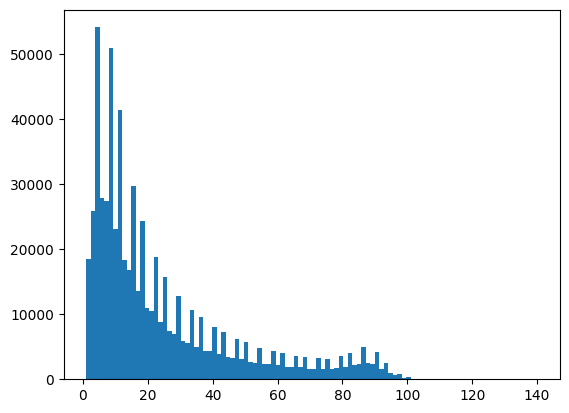

In [5]:
import matplotlib.pyplot as plt

comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

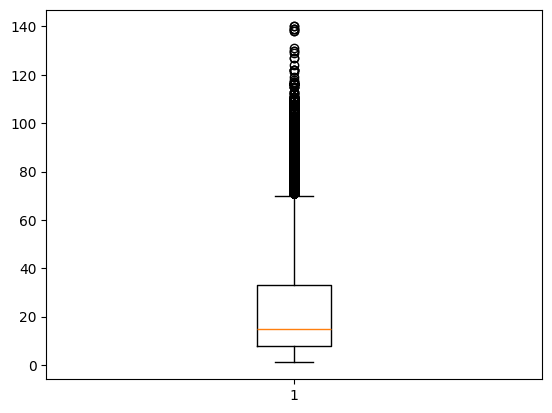

In [6]:
plt.boxplot(comments_len)
plt.show

In [9]:
# 评论词汇长度在10～150之间
ds_comments = [c for c in ds_comments if len(c[0]) in range(10, 150)]

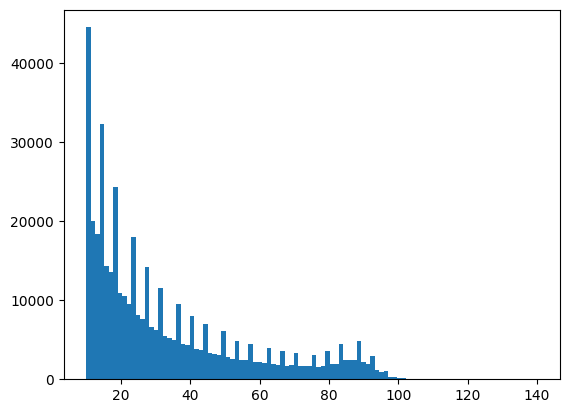

In [10]:
comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

In [11]:
import pickle

with open('E:\\workspacepython\\AiPremiumClass\\doubanmovie.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)